# IMDB movie review


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

In [5]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [8]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


# Data Modelling

In [32]:

# Converting 'Year' to numeric
data['Year'] = data['Year'].str.extract('(\d{4})').astype(float)

# Converting 'Duration' to numeric
data['Duration'] = data['Duration'].str.extract('(\d+)').astype(float)

# Cleaning 'Votes' and convert to numeric
data['Votes'] = pd.to_numeric(data['Votes'].str.replace(',', '').str.replace('$', '').str.replace('M', '000000').str.replace('k', '000'), errors='coerce')


C:\Users\HP\AppData\Local\Temp\ipykernel_14276\3526206319.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Votes'] = pd.to_numeric(data['Votes'].str.replace(',', '').str.replace('$', '').str.replace('M', '000000').str.replace('k', '000'), errors='coerce')


In [11]:
data.describe()

,Year,Duration,Rating,Votes
count,14981.000000,7240.000000,7919.000000,7920.000000
mean,1987.012215,128.126519,5.841621,1938.276283
std,25.416689,28.912724,1.381777,11601.703700
min,1913.000000,2.000000,1.100000,5.000000
25%,1968.000000,110.000000,4.900000,16.000000
50%,1991.000000,131.000000,6.000000,55.000000
75%,2009.000000,147.000000,6.800000,404.000000
max,2022.000000,321.000000,10.000000,591417.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   float64
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   float64
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.2+ MB


In [38]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [35]:
# Drop rows with missing 'Rating'
data = data.dropna(subset=['Rating'])

# Fill missing values for categorical columns with 'Unknown'
data['Genre'] = data['Genre'].fillna('Unknown')
data['Director'] = data['Director'].fillna('Unknown')
data['Actor 1'] = data['Actor 1'].fillna('Unknown')
data['Actor 2'] = data['Actor 2'].fillna('Unknown')
data['Actor 3'] = data['Actor 3'].fillna('Unknown')

In [37]:
mean_duration = data['Duration'].mean()
data['Duration'] = data['Duration'].fillna(mean_duration)

# Data Visualization

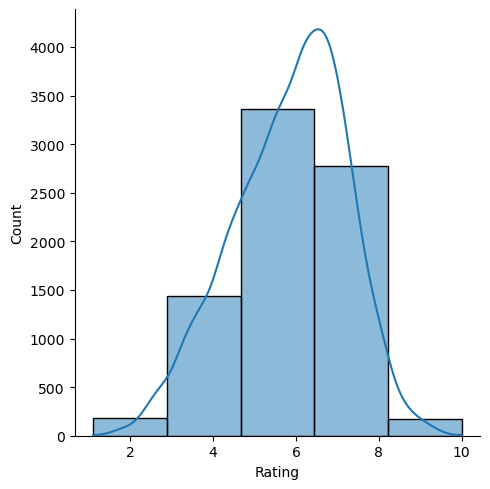

In [15]:
sns.displot(data, x='Rating', kde=True, bins=5)
plt.show()

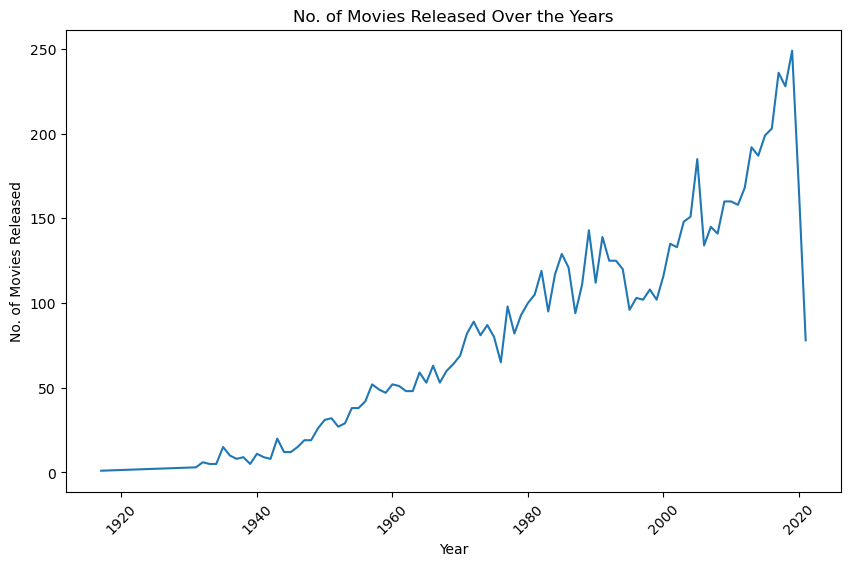

In [16]:
#No. of moviews released over years
movies_per_year = data['Year'].value_counts().sort_index(ascending=True)

plt.figure(figsize=(10, 6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)
plt.xlabel('Year')
plt.ylabel('No. of Movies Released')
plt.title('No. of Movies Released Over the Years')
plt.xticks(rotation=45)
plt.show()

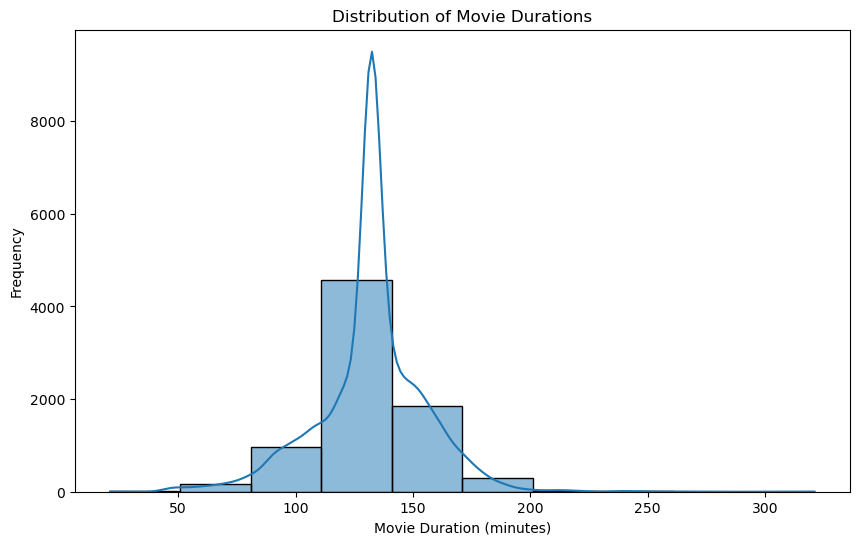

In [39]:
#Distribution of Movie durations
plt.figure(figsize=(10, 6))
sns.histplot(data['Duration'], bins=10, kde=True)
plt.xlabel('Movie Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Durations')
plt.show()


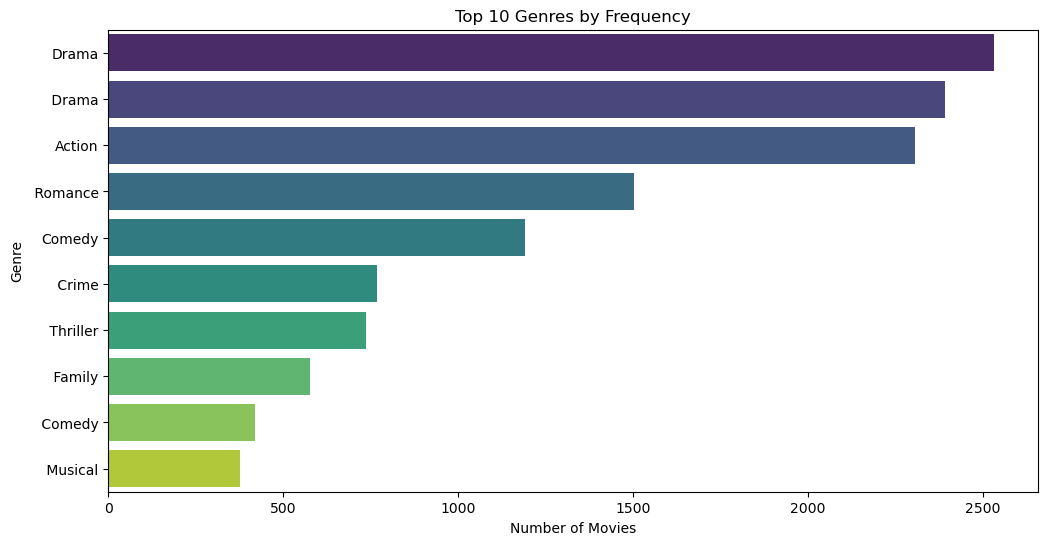

In [21]:


# Plot 4: Top 10 Genres by Frequency
# Split genres into individual entries
genres_split = data['Genre'].str.split(',', expand=True).stack()
genres_split.index = genres_split.index.droplevel(-1)
genres_split.name = 'Genre'
genre_counts = genres_split.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Genres by Frequency')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

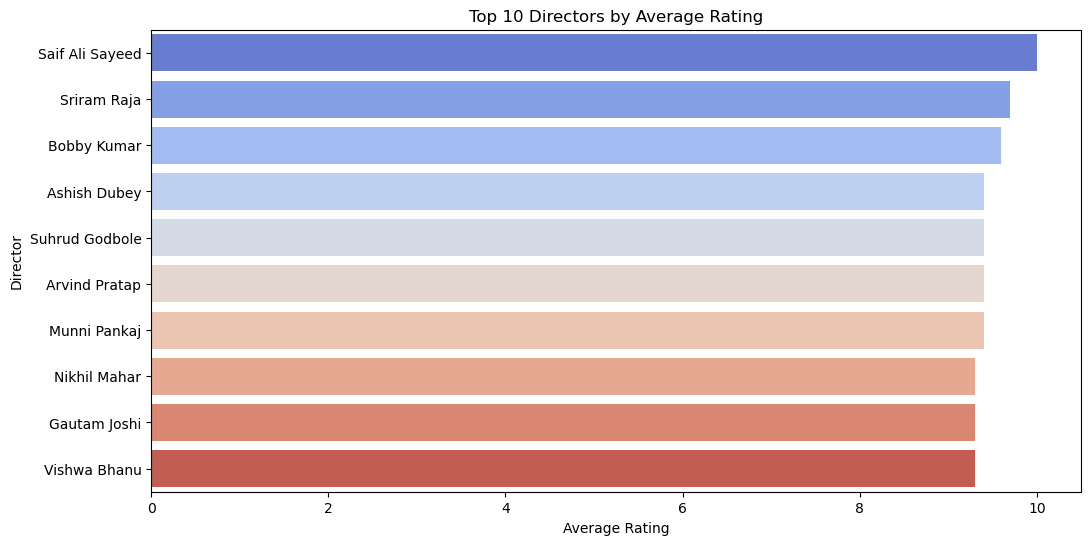

In [22]:
# Plot 5: Top 10 Directors by Average Rating
top_directors = data.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm')
plt.title('Top 10 Directors by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.show()


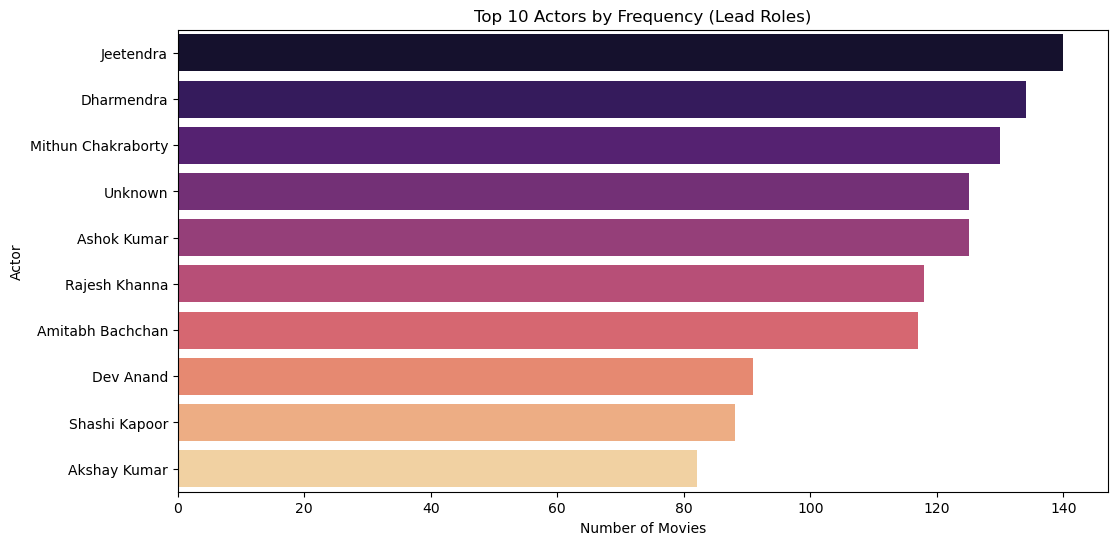

In [23]:
# Plot 6: Top 10 Actors by Frequency

top_actors = data['Actor 1'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='magma')
plt.title('Top 10 Actors by Frequency (Lead Roles)')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

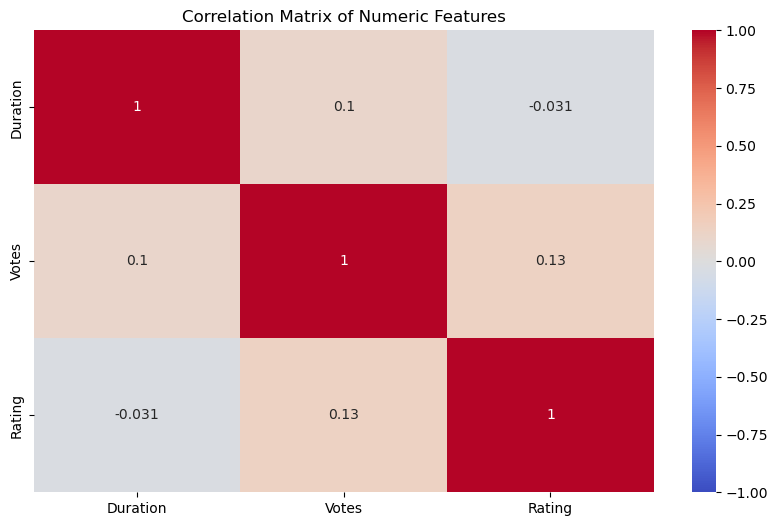

In [25]:
#Plot 7: Correlation Matrix
plt.figure(figsize=(10, 6))
numeric_data = data[['Duration', 'Votes', 'Rating']].dropna()
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Feature engineering

In [46]:
#dropping name column as it is not required
data.drop('Name' ,axis = 1 , inplace = True)

In [47]:
data


,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019.0,109.00000,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019.0,110.00000,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997.0,147.00000,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005.0,142.00000,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012.0,82.00000,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15501,1992.0,132.29448,"Action, Crime, Drama",5.3,135.0,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,1989.0,125.00000,"Action, Crime, Drama",5.8,44.0,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,1988.0,132.29448,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,1999.0,129.00000,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [49]:
#Grouping the categorical columns with their mean rating and creating new features

genre_mean_rating = data.groupby('Genre')['Rating'].transform('mean')
data['genre_mean_rating'] = genre_mean_rating

director_mean_rating = data.groupby('Director')['Rating'].transform('mean')
data['Director_mean_rating'] = director_mean_rating

actor1_mean_rating = data.groupby('Actor 1')['Rating'].transform('mean')
data['Actor1_mean_rating'] = actor1_mean_rating

actor2_mean_rating = data.groupby('Actor 2')['Rating'].transform('mean')
data['Actor2_mean_rating'] = actor2_mean_rating

actor3_mean_rating = data.groupby('Actor 3')['Rating'].transform('mean')
data['Actor3_mean_rating'] = actor3_mean_rating


In [51]:
X = data[['Year','Duration','Votes','genre_mean_rating','Director_mean_rating','Actor1_mean_rating','Actor2_mean_rating','Actor3_mean_rating']]
y = data['Rating']

In [52]:
X

,Year,Duration,Votes,genre_mean_rating,Director_mean_rating,Actor1_mean_rating,Actor2_mean_rating,Actor3_mean_rating
1,2019.0,109.00000,8.0,6.352082,7.000000,6.850000,7.000000,7.000000
3,2019.0,110.00000,35.0,5.722500,4.400000,5.420000,4.400000,4.450000
5,1997.0,147.00000,827.0,6.224490,5.358824,4.788889,5.786667,5.846154
6,2005.0,142.00000,1086.0,6.820000,7.500000,5.356000,6.050000,6.500000
8,2012.0,82.00000,326.0,5.463636,5.600000,5.600000,5.883333,5.600000
...,...,...,...,...,...,...,...,...
15501,1992.0,132.29448,135.0,5.616067,5.571429,5.742537,6.075000,4.895652
15503,1989.0,125.00000,44.0,5.616067,5.885714,6.328571,5.800000,5.850000
15504,1988.0,132.29448,11.0,5.092566,4.075000,6.025532,3.700000,4.600000
15505,1999.0,129.00000,655.0,5.468266,5.225000,5.481707,4.645455,5.617143


In [53]:
y

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15501    5.3
15503    5.8
15504    4.6
15505    4.5
15508    6.2
Name: Rating, Length: 7919, dtype: float64

In [54]:
# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

In [81]:
model = RandomForestRegressor(n_estimators=500, random_state=42)

In [82]:
# Fitting the model
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)

In [83]:
# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.37097781643939415
Root Mean Squared Error: 0.6090794828586776
R-squared: 0.8004578511222739
